# Ecuaciones diferenciales

El objetivo del análisis numérico de ecuaciones diferenciales es proveer una solución numérica de una ecuación diferencial de la forma:

$$\dot{x} = f(t,x)$$

con $x_0=x(0)$ dado y $f$ conocida. En general para una $f$ genérica, el problema anterior no puede resolverse explícitamente, por lo que se busca calcular $x(t_k)$ en una grilla adecuada de valores de $t_k$.



### Ejemplo

Considere el siguiente sistema lineal de primer orden:

$$\dot{x} = -ax, \quad x(0)=x_0.$$

La solución explícita de este sistema puede calcularse y es:

$$x(t) = x_0 e^{-at}.$$

Se desea resolverlo ahora numéricamente.

## Método de Euler

El Método de Euler es el método más sencillo de resolver lo anterior en un intervalo $[0,T]$. Se basa en aproximar localmente la solución por una recta de pendiente igual a la derivada $f(t,x)$, es decir:

$$x(t+h) \approx x(t) + \dot{x}(t) h  = x(t) + f(t,x(t)) h $$

Sea $x(t)$ la solución con condición inicial $x_0$ y $h>0$ un paso de tiempo. El primer paso consiste en tomar $t_0=0$, $x_0=x(0)$, $t_1=h$, y $x_1$ obtenerlo a partir de la observación anterior:

$$x_1 = x_0 + f(t_0,x_0) h.$$

Luego de calculado $x_1$ procedemos recursivamente definiendo:

$$x_{k+1} = x_k + f(t_k,x_k) h.$$

hasta cubrir todo el intervalo $[0,T]$ (es decir $k$ va de $0$ hasta $\approx T/h$).

### Ejemplo

Resolvamos la ecuación anterior por el método de Euler.

In [1]:

function euler(f,x0,h,T0,Tfinal)
    
    T=[T0];
    X=[x0];
    
    t=T0;
    x=x0;
    
    while(t<Tfinal)
        x=x+h*f(t,x);
        t=t+h;
        push!(T,t);
        push!(X,x);
    end
    
    return T,X;
end

euler (generic function with 1 method)

In [2]:
#Defino la función. En este caso solo depende de x.
a=2;
f(t,x)=-a*x;

#Condición inicial.
x0=2.0;

#paso e intervalo de trabajo.
h=0.1;
t0=0.0;
T=10.0;

t,x = euler(f,x0,h,t0,T);

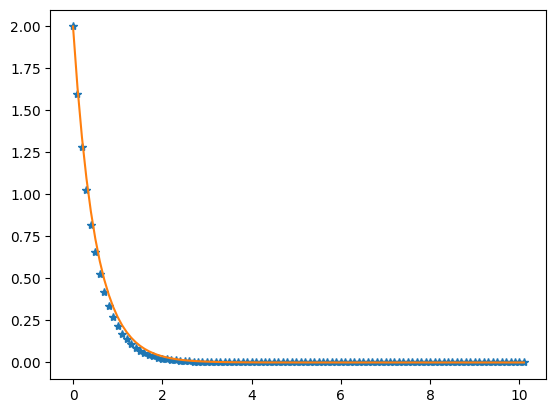

In [3]:
using PyPlot
#Grafico la estimación y la solución oficial
plot(t,x,"*");
plot(t,x0*exp.(-a*t));

### Fuentes de Error

El error del método anterior depende fuertemente del paso $h$ elegido. En general, si $h\to 0$ el error se reduce. Existen dos tipos de error:

* **Error local:** Es el error que surge localmente de aproximar la solución por una recta.
* **Error global:** Es el acumulado de los errores locales. Notar que al calcular $x_{k+1}$ a partir de $x_k$, estamos trasportando el error del paso anterior al siguiente.

Si $h$ es muy grande, entonces el método puede dar resultados no satisfactorios, ya que la acumulación de error global aleja al resultado de la solución.

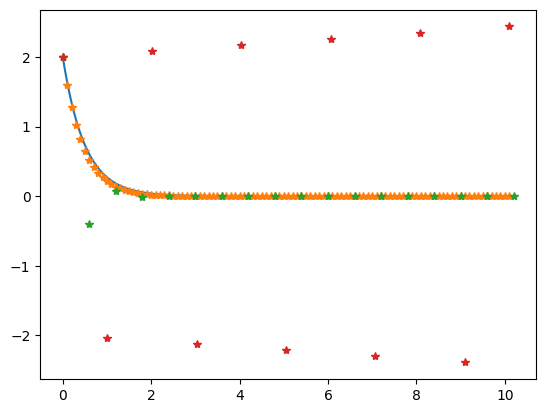

In [4]:
T=10;
t=collect(0:.01:T)
plot(t,x0*exp.(-a*t));

h=0.1;
t,x = euler(f,x0,h,t0,T)
plot(t,x,"*");

h=0.6;
t,x = euler(f,x0,h,t0,T)
plot(t,x,"*");

h=1.01;
t,x = euler(f,x0,h,t0,T)
plot(t,x,"*");


### Comportamiento del error global

Sea $E_k = x(t_k) - x_k$ el error cometido en el paso $k$. Calculemos el error global en el paso $k+1$. Desarrollabdo por Taylor se tiene que:

$$x(t_{k+1}) = x(t_k) + \dot{x}(t_k) h+ \ddot{x}(\xi_k)\frac{h^2}{2} \quad \xi_k\in(t_k,t_{k+1}).$$

Por la recursión de Euler además:

$$x_{k+1} = x_k + f(t_k,x_k) h.$$

Restando las ecuaciones anteriores tenemos:

$$E_{k+1} = x(t_{k+1}) - x_{k+1} = [x(t_k) - x_k] + [\dot{x}(t_k) - f(t_k,x_k)] h + \ddot{x}(\xi_k)\frac{h^2}{2}.$$

Usando que $\dot{x}(t_k) = f(t_k,x(t_k))$ podemos reescribir lo anterior como:

$$E_{k+1} = E_k + [f(t_k,x(t_k)) - f(t_k,x_k)] h + \ddot{x}(\xi_k)\frac{h^2}{2}.$$

Por último, usando el teorema del valor medio para $f$ queda:

$$E_{k+1} = E_k + \frac{\partial f}{\partial x} f(t_k,\eta_k)[x(t_k) - x_k)] h + \ddot{x}(\xi_k)\frac{h^2}{2}.$$
con $\eta_k$ un punto intermedio.

Es decir:

$$E_{k+1} = \left[1+ \frac{\partial f(t_k,\eta_k)}{\partial x}  h \right] E_k + \ddot{x}(\xi_k)\frac{h^2}{2}.$$


El error global se compone entonces de dos términos:

* $\left[1+ \frac{\partial f(t_k,\eta_k)}{\partial x}  h \right] E_k$, propagación del error anterior al paso $k+1$.
* $e_{k+1} = \ddot{x}(\xi_k)\frac{h^2}{2}$, nuevo error local introducido en el paso $k$.

Para que el método no amplifique los errores se requiere que:

$$\left|1+ \frac{\partial f(t_k,\eta_k)}{\partial x}  h \right| < 1$$.



### Ejemplo:

Para la ecuación anterior $\frac{\partial f(t_k,\eta_k)}{\partial x} = -a$, por lo que la desigualdad anterior queda:

$$|1-ah|<1.$$

Si $a<0$, la ecuación es intestable y los errores siempre se amplifican. Si $a>0$, $1-ah<1$ pero se requiere además que:

$$1-ah > -1 \Rightarrow h<\frac{2}{a}.$$

Por eso en el ejemplo anterior, para $a=2$ y $h=1.01$ el error se vuelve inestable.

## El caso vectorial

Observemos que el método anterior funciona también si $x\in\mathbb{R}^n$, es decir, una ecuación vectorial de cualquier orden. Podemos utilizar esto para simular sistemas físicos.

### Ejemplo:

Consideremos el péndulo de largo $L$, sujeto a un campo gravitatorio de constante $g$. La ecuación del péndulo es:

$$\ddot{\theta} = - \frac{g}{L} \sin(\theta).$$

siendo $\theta$ el ángulo. Normalmente esta ecuación se analiza linealizando alrededor de $\theta=0$, pero con el método anterior podemos resolverla numéricamente.

## Ejercicio

1. Escriba la ecuación anterior utilizando el estado $x = [\theta \; \dot{\theta}]$ en $\mathbb{R}^2$.

2. Adapte en caso de ser necesario la función `euler` para poder resolver ecuaciones en estado vectorial.

3. Resuelva la ecuación anterior para $g/L = 2$ numéricamente, utilizando diferentes valores de paso. Analice el comportamiento al cambiar el paso. 

4. Agregue rozamiento al péndulo y modifique la ecuaciòn, volviendo a resolver.